In [0]:
import os
import dill
from google.colab import drive

backup_dir = '/content/drive/My Drive/gunlaws'
backup_file = 'word2vec_deeplearning_classifier_multiclass_env.db'
backup_path = backup_dir + '/' + backup_file
def init_drive():
  # create directory if not exist
  drive.mount('drive')
  if not os.path.exists(backup_dir):
    !mkdir backup_dir

def restart_kernel():
  os._exit(00)

def save_session():
  init_drive()
  dill.dump_session(backup_path)

def load_session():
  init_drive()
  dill.load_session(backup_path)

In [2]:
save_session()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
import numpy as np
import pandas as pd
import nltk
import spacy
from tqdm import tqdm
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [0]:
df1=pd.read_excel('/content/drive/My Drive/gunlaws/shuffled_gunlaw_multiclass.xlsx')

In [5]:
df1.drop(df1.columns[[0]],axis=1,inplace=True)
df1.head()

,date,text,label
0,2019-09-20,RT @truly_daphne: What I meant was -- it is cr...,for
1,2019-09-23,RT @gmbutts: Mr Scheer said he couldn’t wait t...,for
2,2019-11-09,I've never seen Socialism summed up better in ...,against
3,2019-11-05,In for a rude #AR15 awakening... https://t.co/...,against
4,2019-11-20,Gates/Buffett 2020 #gatesbuffett2020 @WarrenBu...,neutral


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
df1['label']= labelencoder_y.fit_transform(df1['label'])
df1 = pd.concat([df1[['date','text']],pd.get_dummies(df1['label'])],axis=1)

In [7]:
df1.head()

,date,text,0,1,2
0,2019-09-20,RT @truly_daphne: What I meant was -- it is cr...,0,1,0
1,2019-09-23,RT @gmbutts: Mr Scheer said he couldn’t wait t...,0,1,0
2,2019-11-09,I've never seen Socialism summed up better in ...,1,0,0
3,2019-11-05,In for a rude #AR15 awakening... https://t.co/...,1,0,0
4,2019-11-20,Gates/Buffett 2020 #gatesbuffett2020 @WarrenBu...,0,0,1


In [0]:
X_train = df1.loc[:5000,'text'].values
y_train = df1.loc[:5000,'label'].values
X_test = df1.loc[5000:6000,'text'].values
y_test = df1.loc[5000:6000,'label'].values


In [9]:
X_train

array(['RT @truly_daphne: What I meant was -- it is criminal to offer any criminal group free guns in order to kill simply because the group is als…',
       'RT @gmbutts: Mr Scheer said he couldn’t wait to win the @CPC_HQ leadership and “go shoot something” with Faith Goldy. Then he invited peopl…',
       "I've never seen Socialism summed up better in a picture\n\n#trump #maga #democrats #libertarian #conservatives #meme #conservativememes #usa https://t.co/lZh2pzoRk1",
       ...,
       'My five year old had an active shooter drill today. This is the America we live in now😔😔. It breaks my heart she has to do this. I’m glad they are preparing her in case but we shouldn’t have to accept this as our new reality 😭\n\n#GunControl #ThisIsAmerica',
       'RT @Isaiahuba: Just realise FB has removed thousands  of likes and components made on my post\n\n#FreedomofExpression #FreedomOfMovement @Pla…',
       'RT @CivilAdvantage1: @Polysesouvient @AnnaLeask And now for the raids, or I guess m

In [0]:
#from tensorflow.python.keras.preprocessing.text import Tokenizer
#form tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer_obj = Tokenizer()
total_tweets = X_train.tolist()+X_test.tolist()
tokenizer_obj.fit_on_texts(total_tweets)

max_length = max([len(s.split()) for s in total_tweets])
vocab_size = len(tokenizer_obj.word_index)+1
X_train_tokens = tokenizer_obj.texts_to_sequences(X_train)
X_test_tokens = tokenizer_obj.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_tokens,maxlen = max_length,padding = 'post')
X_test_pad = pad_sequences(X_test_tokens,maxlen = max_length,padding = 'post')

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM , GRU
from keras.layers.embeddings import Embedding

EMBEDDING_DIM = 100

print('Build model...')

model = Sequential()
model.add(Embedding(vocab_size,EMBEDDING_DIM,input_length = max_length))
model.add(GRU(units=32,dropout=0.2 , recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'])

Build model...


In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 95, 100)           2636900   
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                12768     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,649,701
Trainable params: 2,649,701
Non-trainable params: 0
_________________________________________________________________


In [13]:
print('Training.....')
model.fit(X_train_pad, y_train, batch_size=256,epochs=10,validation_data=(X_test_pad,y_test),verbose=2)

Training.....
Train on 5001 samples, validate on 1001 samples
Epoch 1/10
 - 6s - loss: 0.5766 - acc: 0.4349 - val_loss: 0.4583 - val_acc: 0.4266
Epoch 2/10
 - 4s - loss: 0.4776 - acc: 0.4361 - val_loss: 0.4461 - val_acc: 0.4266
Epoch 3/10
 - 5s - loss: 0.4748 - acc: 0.4361 - val_loss: 0.4481 - val_acc: 0.4266
Epoch 4/10
 - 4s - loss: 0.4717 - acc: 0.4363 - val_loss: 0.4466 - val_acc: 0.4266
Epoch 5/10
 - 5s - loss: 0.4723 - acc: 0.4363 - val_loss: 0.4476 - val_acc: 0.4266
Epoch 6/10
 - 5s - loss: 0.4762 - acc: 0.4363 - val_loss: 0.4472 - val_acc: 0.4266
Epoch 7/10
 - 4s - loss: 0.4737 - acc: 0.4363 - val_loss: 0.4469 - val_acc: 0.4266
Epoch 8/10
 - 4s - loss: 0.4739 - acc: 0.4363 - val_loss: 0.4486 - val_acc: 0.4266
Epoch 9/10
 - 4s - loss: 0.4742 - acc: 0.4363 - val_loss: 0.4461 - val_acc: 0.4266
Epoch 10/10
 - 4s - loss: 0.4740 - acc: 0.4363 - val_loss: 0.4473 - val_acc: 0.4266


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history,name_of_fig):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    f=plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    f.savefig(name_of_fig, bbox_inches='tight', dpi=400)

In [15]:
from keras.models import Sequential
from keras import layers
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=EMBEDDING_DIM, 
                           input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 95, 100)           2636900   
_________________________________________________________________
flatten_1 (Flatten)          (None, 9500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                95010     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 2,731,921
Trainable params: 2,731,921
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train_pad, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test_pad, y_test),
                    batch_size=256)
loss, accuracy = model.evaluate(X_train_pad, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Training Accuracy: 0.8044
Testing Accuracy:  0.5714


TypeError: ignored

In [17]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=EMBEDDING_DIM, 
                           input_length=max_length))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 95, 100)           2636900   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 2,637,943
Trainable params: 2,637,943
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train_pad, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test_pad, y_test),
                    batch_size=256)
loss, accuracy = model.evaluate(X_train_pad, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
#plot_history(history)

ValueError: ignored

In [0]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [0]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('/content/drive/My Drive/gunlaws/glove.6B.50d.txt',tokenizer_obj.word_index,embedding_dim)

In [0]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

In [0]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=max_length, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [0]:
history = model.fit(X_train_pad, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test_pad, y_test),
                    batch_size=256)
loss, accuracy = model.evaluate(X_train_pad, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [8]:
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tweets_lines=list()
lines=df1['text'].values.tolist()

for line in lines:
  tokens = word_tokenize(line)
  tokens = [w.lower() for w in tokens]
  table = str.maketrans('','',string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  words = [word for word in stripped if word.isalpha()]
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]
  tweets_lines.append(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
import gensim
EMBEDDING_DIM=100

model = gensim.models.Word2Vec(sentences=tweets_lines,size=EMBEDDING_DIM,window=10,workers=4,min_count=1)
words = list(model.wv.vocab)
print('Vocabulary size:', len(words))

Vocabulary size: 66295


In [11]:
model.wv.most_similar('antigun')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mantel', 0.9877434372901917),
 ('felons', 0.9845225214958191),
 ('offense', 0.9836823344230652),
 ('unlawful', 0.9817073941230774),
 ('nationally', 0.9814889430999756),
 ('gaslighting', 0.9813016653060913),
 ('absurd', 0.9809209704399109),
 ('deported', 0.9803258180618286),
 ('learjetter', 0.9798320531845093),
 ('masses', 0.9798243045806885)]

In [10]:
model.wv.save_word2vec_format('/content/drive/My Drive/gunlaws/gulaws_embedding_word2vec_multiclass.txt',binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [11]:
import os
embeddings_index={}
f= open(os.path.join('','/content/drive/My Drive/gunlaws/gulaws_embedding_word2vec.txt'),encoding='utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.array(values[1:])
  embeddings_index[word]=coefs
f.close

<function TextIOWrapper.close>

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tweets_lines)
sequences = tokenizer_obj.texts_to_sequences(tweets_lines)
max_length = max([len(s.split()) for s in lines])
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.',len(word_index))

tweets_pad = pad_sequences(sequences,maxlen=max_length)
sentiment = df1.iloc[:,2:]
print('shape of tweets',tweets_pad.shape)
print('shape of sentiment',sentiment.shape)

Using TensorFlow backend.


Found %s unique tokens. 66295
shape of tweets (52103, 106)
shape of sentiment (52103, 3)


In [0]:
df3=pd.concat([pd.DataFrame(lines),pd.DataFrame(tweets_pad)],axis=1)

In [19]:
pd.DataFrame(np.array(lines))

,0
0,RT @truly_daphne: What I meant was -- it is cr...
1,RT @gmbutts: Mr Scheer said he couldn’t wait t...
2,I've never seen Socialism summed up better in ...
3,In for a rude #AR15 awakening... https://t.co/...
4,Gates/Buffett 2020 #gatesbuffett2020 @WarrenBu...
...,...
52098,The common citizen must be allowed a gun for s...
52099,NAME ABORTION PROVIDING POLITICIANS: 14 allege...
52100,What I meant was -- it is criminal to offer an...
52101,RT @Right_to_Life: Many Americans believe this...


In [0]:
num_words = len(word_index)+1
embedding_matrix = np.zeros((num_words,EMBEDDING_DIM))

for word , i in word_index.items():
  if i > num_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [21]:
print(num_words)

66296


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM , GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras import layers


model = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer = Constant(embedding_matrix),
                            input_length = max_length,
                            trainable=False)
model.add(embedding_layer)
model.add(GRU(units=16,dropout=0.2 , recurrent_dropout=0.2))
#model.add(layers.GlobalMaxPool1D())
#model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

#model.add(GRU(units=32 , dropout = 0.2 , recurrent_dropout = 0.2))
#model.add(Dense(1 ,activation='sigmoid'))

#model.compile(loss='binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 106, 100)          6629600   
_________________________________________________________________
gru_1 (GRU)                  (None, 16)                5616      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 6,635,267
Trainable params: 5,667
Non-trainable params: 6,629,600
_________________________________________________________________


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_testing ,y_train, y_testing = train_test_split(df3, sentiment, test_size = 0.60, random_state = 1)

In [0]:
X_test, X_val ,y_test, y_val = train_test_split(X_testing, y_testing, test_size = 0.50, random_state = 0)

In [18]:
print('Training.....')
history=model.fit(X_train.iloc[:,1:], y_train, batch_size=256,epochs=10,validation_data=(X_val.iloc[:,1:],y_val),verbose=True)

Training.....



Train on 20841 samples, validate on 15631 samples
Epoch 1/10





20841/20841 [==============================] - 30s 1ms/step - loss: 0.5077 - acc: 0.7550 - val_loss: 0.3654 - val_acc: 0.8386
Epoch 2/10
20841/20841 [==============================] - 22s 1ms/step - loss: 0.3173 - acc: 0.8633 - val_loss: 0.2258 - val_acc: 0.9088
Epoch 3/10
20841/20841 [==============================] - 21s 1ms/step - loss: 0.2100 - acc: 0.9176 - val_loss: 0.1621 - val_acc: 0.9357
Epoch 4/10
20841/20841 [==============================] - 22s 1ms/step - loss: 0.1743 - acc: 0.9313 - val_loss: 0.1525 - val_acc: 0.9395
Epoch 5/10
20841/20841 [==============================] - 21s 1ms/step - loss: 0.1606 - acc: 0.9376 - val_loss: 0.1487 - val_acc: 0.9414
Epoch 6/10
20841/20841 [==============================] - 21s 1ms/step - loss: 0.1572 - acc: 0.9387 - val_loss: 0.1459 - val_acc: 0.9429
Epoch 7/10
20841/20841 [==============================] - 21s 1ms/step - loss: 0.1534 - acc: 0.9402 - val_

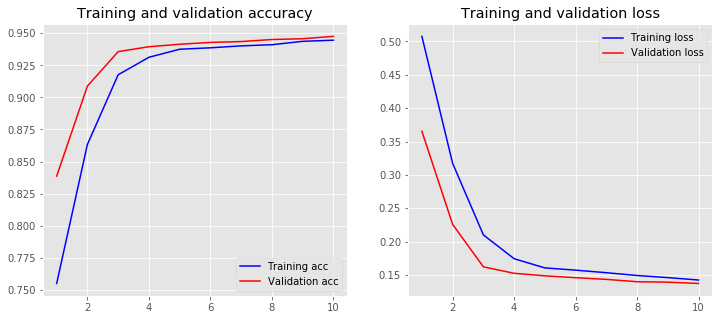

In [19]:
plot_history(history,'accuracy and losses graphs.jpg')

In [0]:
f.savefig('accuracy and losses graphs.jpg', bbox_inches='tight', dpi=400)

In [20]:
loss, accuracy = model.evaluate(X_test.iloc[:,1:], y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

15631/15631 [==============================] - 40s 3ms/step
Testing Accuracy:  0.9481


In [109]:
for i in X_test[27].tolist():
  for j in word_index:
    if word_index[j]==i:
      print(j)


medical
product
website
design
full
preview
https
tcogxufiugake
website
webdesigner
webdesign
web
ui
ux
uiux
school
culture
marcusappeal
warriors
themaskedsinger
america
buttigieg
joebiden
chicagomed
tomisara
survivorseries
technology
portfolioforum
https


In [0]:
pred = model.predict_classes(X_test.iloc[:,1:]).tolist()


In [131]:
X_test

,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
26875,@EmVersion7 What in the actual chrysanthemum t...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1251,49483,49484,12124,8567,4257,9765,215,2075,49485,78,6,2904,1730,49486,434,1113,49487,49488,10860,6,49489,11,1351,2132,3618,1315,1545,2163
18570,Great news!!! \n\nYoung #socialist are BROKE w...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,19,414,1145,1908,2740,3377,694,14670,18639,63,217,349,74,3375,597,73,1387,3,1052,116,536,1
30491,RT @DushyantNaagar: My tributes to legendary t...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,52050,52051,12097,8859,1238,6,7498,38,4443,52052,20095,21526,36
35224,@BetoORourke Bring gloves #IrishBob \n\n#Enfor...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,115,316,7318,30649,9329,397,18,416,911,76,9330,372,68,4,8,9,3387,27,17,2852,210,2548,29,1
31993,See....this is what's wrong with #America. You...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,228,3,6552,322,30203,30204,1439,4117,52997,2399,2659,3872,52998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24267,🛑 BizPac Review News 🛑 \n\n👉 Flashback videos ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,259,208,19,5768,1633,658,16288,113,53,306,16334,1,47744,16,5
10605,@AnnaApp91838450 @sheila14all @politico Thank ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4358,40,71,38668,71,14,60,1876,7,1477,270,1946,6,8110,14,3108,39,17,1041,1598,344,1,2370,2730,110
33402,@maga_swaga I'd follow you and #Trump but my l...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19474,183,14,53859,53860,2818,1047,282,325,9,114,1
31245,RT @Beej66: @highmilage57 I'm in #Trump2020 #W...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,337,5,110,6007,2707,1


In [130]:
print(X_test.iloc[[3],[0]])
#print(pred[2])

                                                       0
35224  @BetoORourke Bring gloves #IrishBob \n\n#Enfor...


In [0]:
save_session()